In [2]:
import cv2
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [10]:
img = cv2.imread('/Users/dianaterraza/Desktop/workspace_python/kodim01.png')

In [11]:
img.shape

(512, 768, 3)

In [12]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

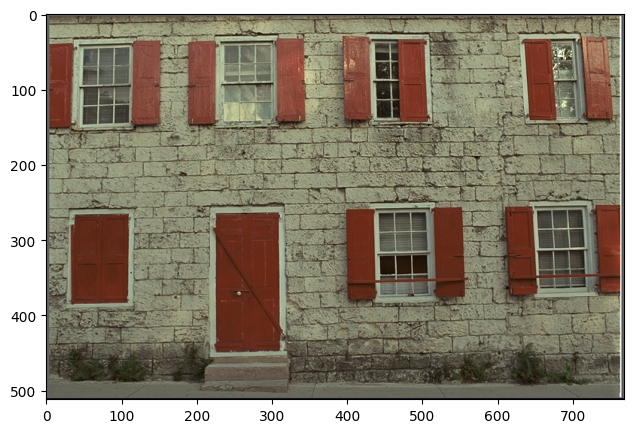

In [13]:
plt.imshow(img)

In [14]:
kernel = np.array([[1,1,1], [1,1,1],[1,1,1]])/9
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [15]:
kernel.shape

(3, 3)

when we apply the kernel we select a portion of the image and run through the image, 0 means we are going to sharp the image 

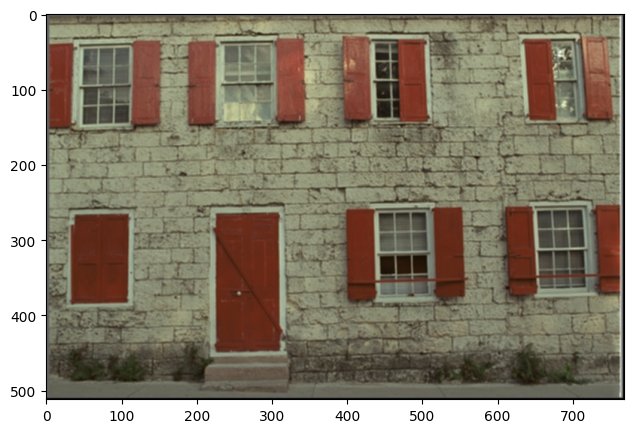

In [17]:
rows, cols, channels = img.shape
out = np.zeros_like(img)

for r in range(1, rows-1):
  for c in range(1, cols-1):
    for ch in range(channels):
      block = img[r-1:r+2, c-1:c+2, ch]
      out[r,c,ch] = np.sum(block*kernel)
plt.imshow(out)

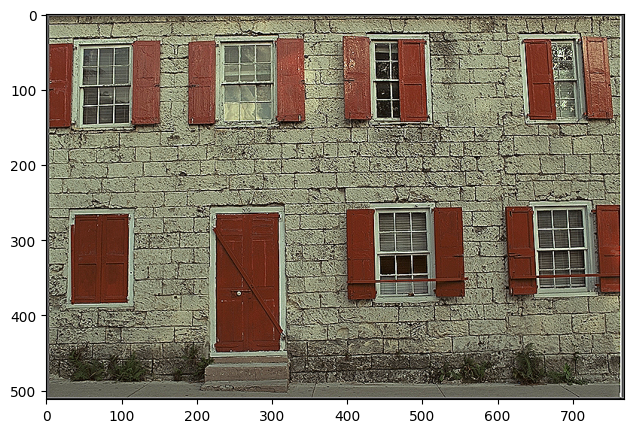

In [18]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
out = cv2.filter2D(img,
                   ddepth = -1,
                   kernel = kernel,
                   borderType = cv2.BORDER_REPLICATE)
plt.imshow(out)

sharpening to enhance the difference and blur are the opposite. Sharp = Nitido. Blur = desenfoque

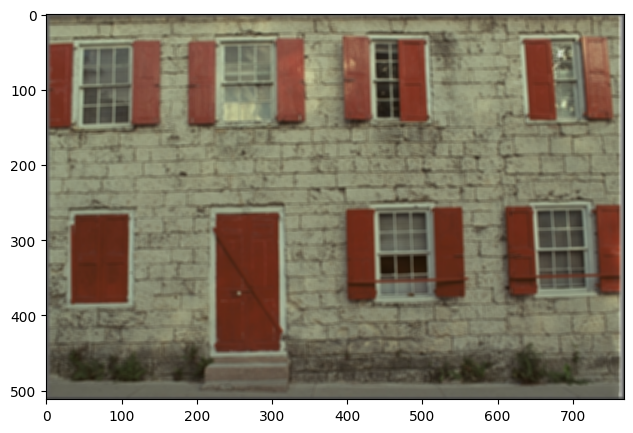

In [19]:
out = cv2.GaussianBlur(img,
                       ksize = (5,5),
                       sigmaX = 5) #standard deviation of the gaussian blur
plt.imshow(out)

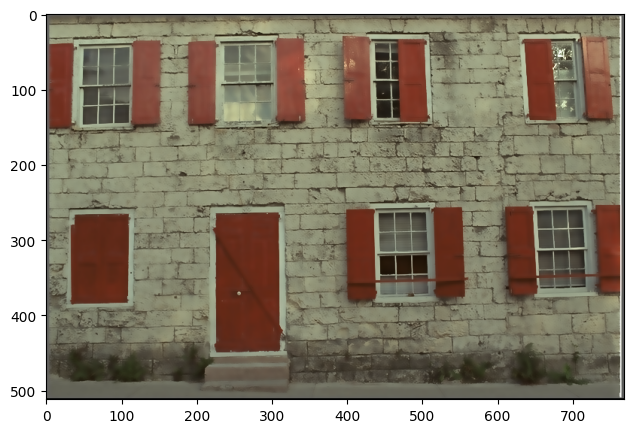

In [25]:
out = cv2.bilateralFilter(img,
                          d = 9, #diameter of the neighbourhood pixel
                          sigmaColor=75, # define the range of colors smooth the image..higher colors more colors to blend
                          sigmaSpace=75) 
plt.imshow(out)

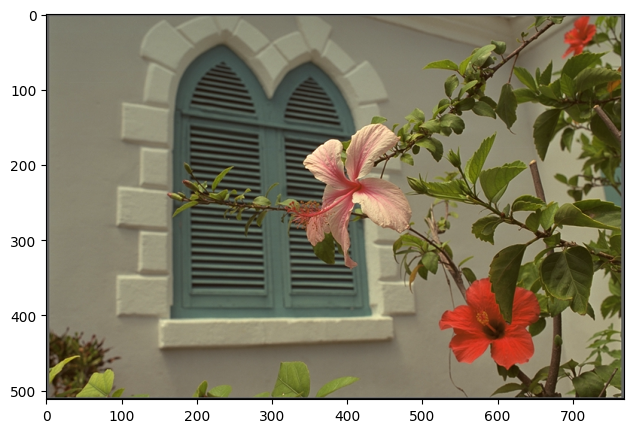

In [27]:
img = cv2.imread('/Users/dianaterraza/Desktop/workspace_python/kodim07.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Add some noise to the image:
1. scaled the img from 0 and 1 (control the ratio, noissy 10 times less)
2. add a clip =  drop the numbers outside than 0 and 1 
3. rescale between 0 and 255 tensor 


In [29]:
noisy = img/255 + 0.1*np.random.randn(*img.shape)
noisy = noisy.clip(0,1)
noisy = (255*noisy).astype(np.uint8)

(<Axes: title={'center': 'Noisy'}>,
 Text(0.5, 1.0, 'Noisy'))

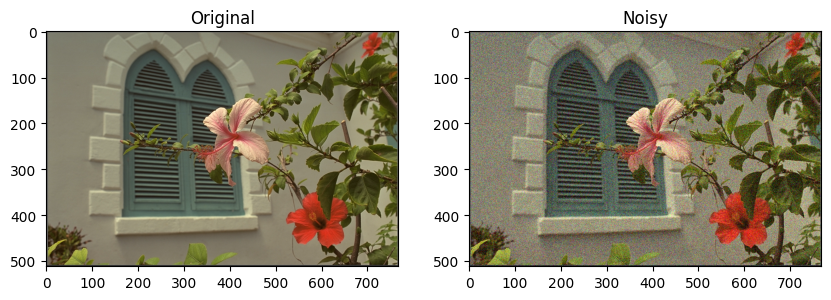

In [30]:
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(noisy), plt.title('Noisy')

Apply the gaussian blur to the noissy image :

(<Axes: title={'center': 'Blured'}>,
 Text(0.5, 1.0, 'Blured'))

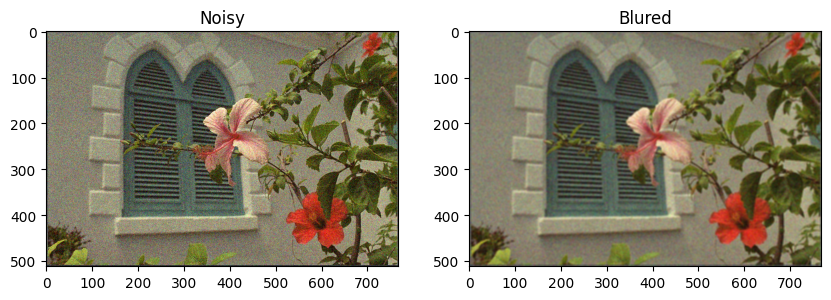

In [31]:
out = cv2.GaussianBlur(noisy,
                       ksize = (5,5),
                       sigmaX=5)
plt.subplot(121), plt.imshow(noisy), plt.title('Noisy')
plt.subplot(122), plt.imshow(out), plt.title('Blured')

(<Axes: >, <matplotlib.image.AxesImage at 0x127c3dd10>)

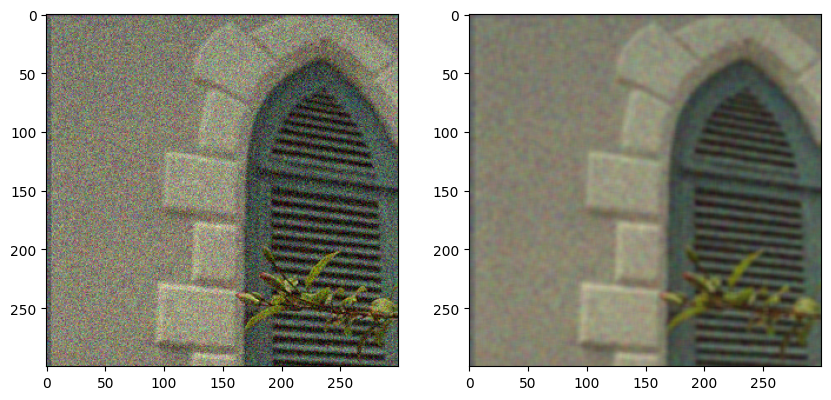

In [32]:
plt.subplot(121), plt.imshow(noisy[0:300, 0:300, :])
plt.subplot(122), plt.imshow(out[0:300, 0:300, :])

Salt and pepper bc is black and white 

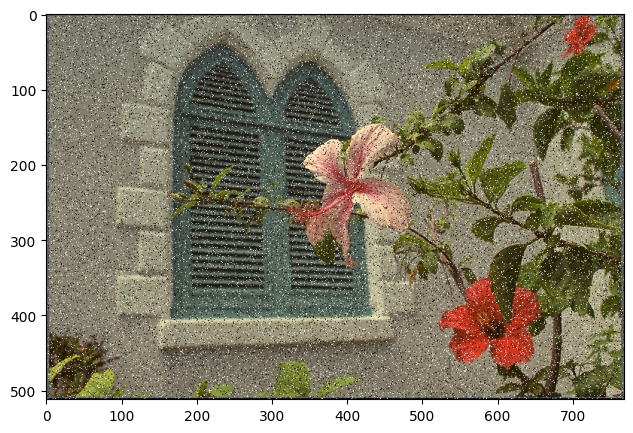

In [34]:
noisy = np.zeros_like(img)

rows, cols, _  = img.shape

probability = 0.1

for r in range(rows):
  for c in range(cols):
    if np.random.rand() < probability:
      if np.random.rand() < 0.5:
        noisy[r,c,:] = 255
      else:
        noisy[r,c,:] = 0
    else:
      noisy[r,c,:] = img[r,c,:]
plt.imshow(noisy)

Replace everything with the median in the below kernel:
The constant is the median and then this will remove the salt and pepper

(<Axes: title={'center': 'Median'}>,
 Text(0.5, 1.0, 'Median'))

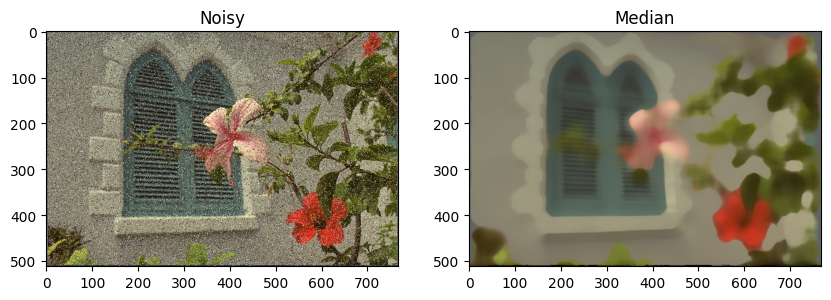

In [35]:
median = cv2.medianBlur(noisy, ksize = 33)
plt.subplot(121), plt.imshow(noisy), plt.title('Noisy')
plt.subplot(122), plt.imshow(median), plt.title('Median')